<h1>Нелинейные уравнения и системы в Octave</h1>
<p>Решение нелинейных уравнений — задача достаточно сложная. В этой главе
   мы познакомимся с методами решения нелинейных уравнений и их реализацией в Octave. Отдельно поговорим об использовании встроенных функций Octave для решения нелинейных уравнений. А также узнаем, как решать системы нелинейных уравнений в Octave.</p>
<h2>Методы решения нелинейных уравнений</h2>
<p>Уравнение <i>f(x) = 0</i>, в котором неизвестное входит в аргумент трансцендентных функций, называется
   <i>трансцендентным
      уравнением</i>, если функция <i>f(x)</i>
   является аналитической функцией, но не является алгебраической. К трансцендентным уравнениям принадлежат
   показательные,
   логарифмические и тригонометрические. В общем случае аналитическое решение уравнения <i>f(x) = 0</i> можно
   найти только для узкого класса функций. Чаще всего приходится решать это
   уравнение <i>численными методами</i>.
</p>

<h3>Решение нелинейных и трансцендентных уравнений</h3>

<p>
    Численное решение нелинейного уравнения проводят в два этапа.
Вначале отделяют <i>корни уравнения</i>, т.е. находят промежутки, в которых содержится только один корень. Эти промежутки называют <i>интервалами изоляции корня</i>. Определить их можно,
изобразив график функции <i>f(x)</i>
или любым другим методом. Методы определения интервала изоляции корня основаны на следующем свойстве: если непрерывная
функция <i>f(x)</i> на интервале
[<i>a, b</i>] поменяла знак, т.е. <i>f(a)·f(b) < 0</i>, то она имеет на этом интервале хотя бы один корень. На втором этапе проводят уточнение отделённых корней, или, иначе говоря, находят корни с заданной точностью. В качестве примера на рисунке ниже показано графическое решение уравнения <i>$f (x) = x^2 −cos(5·x) = 0$</i>. Функция дважды пересекает ось абсцисс, следовательно, уравнение <i>$x^2 − cos(5 · x) = 0$</i> имеет два корня. Первый находится на интервале [−0.4; −0.2], второй принадлежит отрезку [0.2; 0.4].
</p>
    
<img src="img/6_1.png" width="400">

<p>Перед тем как начать знакомство с методами уточнения корней, давайте формально определим понятие <b>интервал изоляции</b>. На интервале изоляции корня
   функция <i>f(x)</i> должна удовлетворять слеющующим условиям:</p>
<ol>
   <li>Функция <i>f(x)</i> непрерывна вместе со своими производными первого и второго порядка.</li>
   <li>Функция <i>f(x)</i> на концах интервала [<i>a, b</i>] имеет разные знаки <i>f(a)·f(b)<0 </i>. </li>
   <li> Первая и вторая
      производные $f'(x)$ и $f ''(x)$ сохраняют определённый знак на всём интервале [<i>a, b</i>].</li>
</ol>
 <h4>Метод половинного деления</h4>
<p>Метод половинного деления (метод дихотомии) является простейшим
   методом уточнения корня. Пусть был выбран интервал изоляции [<i>a, b</i>]. Примем
   за первое приближение корня точку <i>c</i>, которая является серединой отрезка [<i>a, b</i>].
   Далее будем действовать по следующему алгоритму:</p>

<ol>
<li>Находим точку <i>c=a+b</i> см. рис. ниже.</li>
<li>Находим значение <i>f(c)</i>.</li>
<li>Если <i>f(a)·f(c)<0 </i>, то корень лежит на интервале [<i>a, c</i>], иначе корень лежит
на интервале [<i>c, b</i>].</li>
<li>Если величина интервала меньше либо равна ε, то найден корень с точностью ε, иначе возвращаемся к п. 1.</li>
</ol>

<img src="img/6_2.png" width="400">
   <p> Однако, несмотря на простоту, такое последовательное сужение интервала
не всегда рационально, так как требует слишком большого количества вычис-
лений. Кроме того, этот способ не всегда позволяет найти решение с заданной
точностью. Рассмотрим другие способы уточнения корня.</p>
<h4>Метод хорд</h4>
Этот метод отличается от метода половинного деления тем, что очередное
приближение берём не в середине отрезка, а в точке пересечения с осью X
(см. рис. ниже) прямой, соединяющей точки <i>(a,f(a))</i> и <i>(b,f(b))</i>.
<img src="img/6_3.png" width="400">
<p> Запишем уравнение прямой, проходящей через
точки с координатами $(a,f(a))$ и $(b,f(b))$ :</p>
<p>$$
   \frac{y-f(a)}{f(b)-f(a)}=\frac{x-a}{b-a},\ \ \ y=\frac{f(b)-f(a)}{b-a}\cdot (x-a)+f(a)
   $$</p>
<p>Прямая, заданная этим уравнением, пересекает ось $X$ при условии $y=0$.</p>
<p>Найдём точку пересечения хорды с осью $X$: $$y=\frac{f(b)-f(a)}{b-a}\cdot (x-a)+f(a), x=a-\frac{f(a)\cdot
   (b-a)}{f(b)-f(a)} $$ </p>
<p>Значит, ${c=a-\frac{f(a)}{f(b)-f(a)}(b-a)}$.</p>
<p>Алгоритм, реализующий метод хорд, можно представить так:</p>
<ol>
<li>Находим точку <i>c</i> по формуле ${c=a-\frac{f(a)}{f(b)-f(a)}(b-a)}$</li>
<li>Если $f(a)·f(c)<0 $, то корень лежит на интервале <i>[a, c]</i>, иначе — на интервале <i>[c, b]</i>.</li>
<li>Если абсолютное значение $f(c)$ не превышает некоторое достаточно малое число ǫ, то найден корень с точностью ǫ, иначе
возвращаемся
к п. 1.</li>
</ol>
<p>Заметим, что описанный способ позволяет достаточно быстро (за меньшее количество шагов, чем в методе
дихотомии) вычислить значение корня уравнения с заданной точностью.</p>
<h4>Метод касательных</h4>
<p>Метод касательных имеет второе название — метод Ньютона. В одной из точек интервала $[a; b]$, пусть это будет точка c,
проведём касательную (см. рис. ниже). Запишем уравнение этой прямой:</p>
$$y = k · x + m.$$
<img src="img/6_4.png" width="400">
<p>Так как эта прямая является касательной и она проходит через точку $(c, f (c))$,
   то $k = f'(c)$.</p>
<p>Следовательно,
   $$y = f'(x) · x + m, f (c) = f ' (c) · c + m, m = f (c) − c · f ' (c),$$
   $$y = f ' (c) · x + f (c) − c · f ' (c), y = f ' (c) · (x − c) + f (c).$$
   Найдём точку пересечения касательной с осью X: $ f ' (c) · (x − c) + f (c) = 0$,
   $$x=c−\frac{f(c)}{f'(c)}$$</p>
<p>Если $|f (x)| < ε$, то точность достигнута и точка $x$ — решение; иначе необходимо переменной $c$ присвоить значение $x$ и
   провести касательную через новую точку $c$; так продолжать до тех пор, пока $|f (x)|$ не станет меньше $ε$. Осталось решить
   вопрос, что выбрать в качестве точки начального приближения $c$. </p>
   <p>В этой точке должны совпадать знаки функции и её
      второй производной. А так как нами было сделано допущение, что вторая и первая производные не меняют знак, то можно
      проверить условие $f (x) · f '' (x)> 0$ на обоих концах
      интервала и в качестве начального приближения взять ту точку, где это условие
      выполняется. Для реализации данного алгоритма нужно найти первую и вторую
      производные функции $f (x)$.</p>
<h4>Метод простой итерации</h4>
<p>Для решения уравнения этим методом необходимо записать уравнение
   $f(x)=0$ в виде $x=\phi(x)$, задать начальное приближение $x_0\in [a;b]$ и организовать следующий итерационный
   вычислительный процесс:
   
   $$x_{k+1}=\phi(x_k),k=0,1,2,...$$
</p>
<p>Вычисление прекратить, если $|x_{k+1}-x_k|<\varepsilon$ ($\varepsilon$ — точность). </p>
<p>
   Если неравенство $|\phi'(x)|<1$ выполняется на всём интервале $[a;b]$, то последовательность $x_0, x_1, x_2,...,x_n,...$ сходится к решению $x^*$ (т.е.$\lim\limits_{k\rightarrow \infty}x_k=x^*$).
</p>
<p>Значение функции
$\phi(x)$ должно удовлетворять условию $|\phi'(x)|<1$
для того, чтобы можно было применить метод простых итераций. Условие $|\phi'(x)|<1$ является <i>достаточным условием сходимости</i> метода простой итерации.</p>

<p>Уравнение $f(x)=0$ можно привести к виду $x=\phi(x)$ следующим
образом. Умножить обе части уравнения $f(x)=0$ на число $\lambda$. К обеим частям уравнения
$\lambda\cdot
f(x)=0$ добавить число $x$. Получим $x=x+\lambda\cdot f(x)$. Это и есть уравнение вида
$x=\phi(x)$, где $$
\phi(x)=x+\lambda\cdot f(x) $$ </p>
<p>Необходимо чтобы неравенство $|\phi'(x)|<1$ выполнялось на интервале $[a;b]$, следовательно,
$|\phi'(x)|=|1+\lambda\cdot f'(x)|$ и $|1+\lambda\cdot f'(x)|<1$ ($|1+\lambda\cdot f'(a)|<1$,
$|1+\lambda\cdot f'(b)|<1$), а значит, с помощью <i>подбора параметра</i> $\lambda$ можно
добиться выполнения <i>условия сходимости</i>.</p>
<p>Рассмотрим процесс нахождения $\lambda$ на примере уже рассмотренного
выше уравнения $x^2-\cos (5\cdot x)=0$, один из корней на ходится на интервале изоляции
$a=0.2;b=0.4$.
$|1+\lambda\cdot f'(a)|<1$ и $|1+\lambda\cdot f'(b)|<1$, $f(x)=x^{2}-\cos (5\cdot x),f'(x)=2\cdot x+5\cdot \sin (5\cdot x)$, $f'(a)=2\cdot 0.2+5\cdot \sin (5\cdot 0.2)\approx 4.6$ , $f'(b)=2\cdot 0.4+5\cdot \sin (5\cdot 0.4)\approx 5.35$,
$|1+\lambda\cdot 4.6|<1$ и $|1+\lambda\cdot 5.35|<1$. Подберём значение $\lambda$, решив неравенство $|1+\lambda\cdot f'(x)|<1$:
</p>

    
<p>
    $$
\left\{\begin{array}{l} \left\{\begin{array}{l} 1+4.6\cdot \lambda<1 \cr 1+4.6\cdot
\lambda>-1
\end{array}\right.\cr
\left\{\begin{array}{l}
\lambda<0 \cr \lambda>-0.37
\end{array}\right.
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
\left\{\begin{array}{l}
\lambda<0 \cr \lambda>-0.4
\end{array}\right.\cr
\left\{\begin{array}{l}
\lambda<0 \cr \lambda>-0.37
\end{array}\right.
\end{array}\right.
\Rightarrow
\left\{\begin{array}{l}
\lambda\in (-0.4;0) \cr
\lambda\in (-0.37;0)
\end{array}\right.
$$
и, следовательно,
$\lambda\in (-0.37;0)$. 
</p>
<h4>Метод секущих</h4>
<p>Суть метода секущих в следующем. Если нам известны значения в двух точках $(x_k, f(x_k))$, $(x_{k+1}, f(x_{k+1}))$
   внутри интервала изоляции $[a;b]$, то через эти точки можно провести прямую до точки ($x_{k+2}$) пересечения её с
   осью абсцисс (см рис. ниже). Выпишем формулу для вычисления $x_{k+2}$.</p>
<p>$$
   x_{k+2}=x_{k+1} - \frac{f(x_{k+1}) \cdot (x_{k+1}-x_k)}{f(x_{k+1})-f(x_k)}, k=0,1,2,...
   $$</p>
<img src="img/6_5.png" width="400">
<p>Вычисления будем продолжать до тех пор, пока очередное значение $f(x_{k+2})$ не станет меньше точности $\varepsilon$.
</p>
<p>Рассмотрим реализацию описанных выше методов в Octave на примере уравнения $x^2-cos(5
   \cdot x)=0$.</p>

error: set: ambiguous text property name X; possible matches:

xlim         xliminclude
Метод половинного деления
x=2.965483e-01	f(x)=3.330669e-16	k=50
Метод хорд
x=2.965483e-01	f(x)=8.326673e-17	k=5
Метод секущих
x=2.965483e-01	f(x)=8.326673e-17	k=6
Метод касательных
x=2.965483e-01	f(x)=8.326673e-17	k=4
Метод простой итерации
x=2.965483e-01	f(x)=-1.804112e-16	k=15


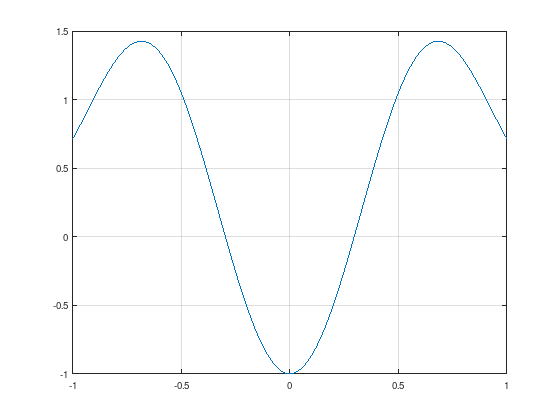

In [1]:
xx=-1:0.02:1;
%Левая часть уравнения
function y=f(x)
   y=x.*x-cos(5*x);
endfunction
%Правая часть уравнения x=fi(x)
function y=fi(lyam,x)
   y=x+lyam*f(x);
endfunction
%Производная функции f(x)
function y=f1(x)
   y=2*x+5*sin(5*x);
endfunction
%Вторая производная функции f(x)
function y=f2(x)
   y=2+25*cos(5*x);
endfunction
%Функция уточнения корня методом половинного деления
%a,b - интервал изоляции
% eps - точность решения уравнения
%c - найденный корень уравнения
%k - количество итерация для нахождения корня
% с точностью eps
function [k,c]=dihot(a,b,eps)
   k=0;
   while abs(b-a)>eps
      k=k+1;
      c=(a+b)/2;
      if f(a)*f(c)>0
         a=c;
         else
         b=c;
      end;
      if abs(f(c))<eps 
         break;
      end
   end
endfunction
%Функция уточнения корня методом хорд
%a,b - интервал изоляции
% eps - точность решения уравнения
%c - найденный корень уравнения
%k - количество итерация для нахождения корня
% с точностью eps
function [k,c]=hord(a,b,eps)
   c=a-f(a)/(f(b)-f(a))*(b-a);
   k=0;
   while abs(f(c))>eps
      k=k+1;
      c=a-f(a)/(f(b)-f(a))*(b-a);
      if f(a)*f(c)>0
         a=c;
         else
         b=c;
      end;
   end
endfunction
%Функция уточнения корня методом секущих
%xo,x1 - две точки внутри интервала изоляции
% eps - точность решения уравнения
%c - найденный корень уравнения
%k - количество итерация для нахождения корня
% с точностью eps

function [k,x2]=sek(x0,x1,eps)
   k=0;
   while abs(f(x1))>eps
      k=k+1;
      x2=x1-f(x1)*(x1-x0)/(f(x1)-f(x0));
      x0=x1;
      x1=x2;
   end
endfunction
%Функция уточнения корня методом касательных
%a,b - интервал изоляции
% eps - точность решения уравнения
%c - найденный корень уравнения
%k - количество итерация для нахождения корня
% с точностью eps
function [k,c]=kasat(a,b,eps)
   k=0;
   if f(a)*f2(a)>0
      c=a;
      else
      c=b;
   end
   while abs(f(c))>eps
      k=k+1;
      c=c-f(c)/f1(c);
   end
endfunction
%Функция уточнения корня методом половинного деления
%a,b - интервал изоляции
%layam - подобранный коэффициент для записи правой части
%уравненния в виде x=fi(x)=x+lyam*f(x)
% eps - точность решения уравнения
%c - найденный корень уравнения
%k - количество итерация для нахождения корня
% с точностью eps

function [k,x]=iter(a,b,lyam,eps)
   x=(a+b)/2;
   k=0;
   while abs(f(x))>eps
      k=k+1;
      x=fi(lyam,x);
   end
endfunction
%Интервал изоляции корня уравнения x=f(x)=x^2-cos(5*x)
a=0.2;
b=0.4;
%Точность решения уравнения

%Построение графика функции y=f(x)=x^2-cos(5x)

plot(xx,f(xx));
grid on;
title("График функции x^2-cos(5x)","X","Y");
[k,c]=dihot(a,b,eps);
printf("Метод половинного деления\n");
printf("x=%e\tf(x)=%e\tk=%d\n",c,f(c),k);
[k,c]=hord(a,b,eps);
printf("Метод хорд\n");
printf("x=%e\tf(x)=%e\tk=%d\n",c,f(c),k);
[k,c]=sek(0.2,0.21,eps);
printf("Метод секущих\n");
printf("x=%e\tf(x)=%e\tk=%d\n",c,f(c),k);
printf("Метод касательных\n");
[k,c]=kasat(0.2,0.4,eps);
printf("x=%e\tf(x)=%e\tk=%d\n",c,f(c),k);
printf("Метод простой итерации\n");
[k,c]=iter(0.2,0.4,-0.2,eps);
printf("x=%e\tf(x)=%e\tk=%d\n",c,f(c),k);

<h3>Особенности решения алгебраических уравнений</h3>
Любое уравнение $f (x) = 0$, где $f (x)$, — это многочлен, отличный от нулевого,
называется <i> алгебраическим уравнением</i> или <i>полиномом</i>. Всякое алгебраическое
уравнение относительно x можно записать в виде
$$P1 xn + P2 xn−1 + · · · + Pn x + Pn+1 = 0,$$
<p>
   где \(P_1 \neq 0\), \(n\geqslant 1\) и \(P_i\) − коэффициенты алгебраического
   уравнения \(n\)–й степени. Например, линейное уравнение —
   это алгебраическое уравнение первой степени, квадратное — второй,
   кубическое — третьей и так далее.
</p>
<p>Рассмотрим <b>алгоритм</b> <i>нахождения всех корней полинома n-й степени</i>. В общем случае и многочлена
   $n$-степени имеет $n$ корней. Однако часть из них может
   быть комплексными. Алгоритм состоит в многократном (количество повторений определяется степенью многочлена)
   повторении
   следующих действий.</p>
<ol>
   <li>Нахождение очередного корня $\alpha$ <i>методом парабол</i>. Выбор метода парабол обусловлен тем, что процесс
      сходится при любом начальном приближении. Формально это не доказано, но ни разу никем не опровергнуто. Метод
      парабол будет представлен ниже.</li>
   <li>Понижение порядка полинома путём деления многочлена на $x-\alpha$. Деление полинома на $x-\alpha$ будет
      осуществляться методом Горнера, который будет описан ниже.</li>
</ol>
<h4>Метод парабол</h4>
<p>
   На практике используется метод параболы и обратной параболы. Метод параболы (или метод Мюллера) позволяет найти
<b>все</b> (<i>действительные</i> и <i>комплексные</i> ) корни полинома, он сходится при любом начальном
приближении. Однако следует учитывать, что вычисления следует вести в комплексных числах. Возможна даже такая
парадоксальная ситуация нахождения действительных корней, используя комплексные вычисления. Основная идея алгоритма
состоит в следующем. Задаются три точки начального приближения $(x_0, y_0 = f(x_0))$, $(x_1,y_1 = f(x_1))$ и $(x_2,y_2 = f(x_2))$. Для
практического использования можно задать одну точку $x^*$, а ещё две вычислить по формулам $0.85 \cdot x^*$, $1.15 \cdot
x^*$. Через эти точки проводим параболу вида $y=a \cdot x^2 + b \cdot x + c$. Точка пересечения параболы с осью абсцисс и
будет точной следующего приближения.
   Расчётная формула для вычисления следующего приближения корня имеет вид

$$x=x_0 -\frac{2 \cdot f(x_0)}{\omega\pm\sqrt{\omega^2-4 \cdot f(x_0) \cdot y_{012}}}.$$
Знак + или - минус выбирается таким образом, чтобы знаменатель был больше.
Здесь $\omega$ вычисляется по формуле $\omega=y_{01}+y_{02}-y_{12},$

$y_{01}=\frac{y_0-y_1}{x_0-x_1}, y_{02}=\frac{y_0-y_2}{x_0-x_2},
y_{12}=\frac{y_1-y_2}{x_1-x_2}$ – разделённые разности первого порядка;

$y_{012}=\frac{y_{12}-y_{01}}{x_0-x_2}$ – разделенная разность второго порядка.
</p>

<p> Дальше отбрасываем $x_0$ и имеем три точки $x, x_1, x_2$. Процесс повторяем до тех пока, $|f(x)|$ не станет
   меньше точности $\varepsilon$.
   
   Если же необходимо найти только действительные корни полинома, то для на хождения очередного корня можно использовать <b>метод обратной параболы</b>.</p>

<h4>Метод обратной параболы</h4>

В этом методе через точки $(x_0,f(x_0))$, $(x_1,f(x_1))$ и $(x_2,f(x_2))$ проводим параболу вида $x=a \cdot y^2 + b \cdot y +c$. Коэффициент параболы $c$ и будет следующим приближением.

$$	a=\frac{(x_2-x_1)(f(x_1)-f(x_0))-(x_1-x_0)(f(x_2)-f(x_1))}{(f(x_2)-f(x_1))(f(x_1)-f(x_0))(f(x_2)-f(x_0))}, $$
$$ b=-a (f(x_2)+f(x_1))+\frac{x_2-x_1}{f(x_2)-f(x_1)}, $$
$$ c=x_{n+1}=x_2-a \cdot f(x_2)^2 -b \cdot f(x_2), $$

Далее $x_0=x_1, x_1=x_2, x_2=c$, пересчитываем $f(x_0), f(x_1), f(x_2)$ и повторяем вычислительный процесс до тех пор пока, $|f(x_2)|$ не станет меньше точности $\varepsilon$.

К значительным минусам метода обратной параболы следует отнести чувствительность к выбору точки начального приближения.
<h4>Понижение порядка полинома</h4>

Рассмотрим алгоритм понижения порядка полинома $$P_1 x^n + P_2 x^{n-1} + \cdots + P_{n} x + P_{n+1} = 0,$$ путём деления многочлена на $x-\alpha$, где $\alpha$ – корень многочлена.
$$P_1 x^n + P_2 x^{n-1} + \cdots + P_{n} x + P_{n+1} = (b_1 x^{n-1} +b_2 x^{n-2}+ \cdots + b_n) (x-\alpha) + b_{n+1},$$
$b_{n+1}$ – остаток  от деления, $b_{n+1}=0$, если $\alpha$ – корень полинома. Алгоритм нахождения коэффициентов $b$ можно записать так:

<code>
    b(1)=P(1)
    for i=2:n+1
        b(i)=b(i-1)*alpha+P(i)
    end
</code>

Этот алгоритм носит название процедуры синтетического деления.
<h4>Вычислительная схема Горнера</h4>
<p>Для понимания алгоритма поиска корней полинома напомним схему Горнера,
с помощью которой можно рассчитать значение полинома
   $$f(x)=P_1 x^n + P_2 x^{n-1} + \cdots + P_{n} x + P_{n+1}$$</p>
<p>Более подробно запишем вычислительную схему Горнера для полинома 4-й степени.
   $$f(x)=P_1 x^4 + P_2 x^3 + P_3 x^2 + P_4 x + P_5=P_5+x(P_4+x(P_3+x(P_2 + x P_1)))$$
   Вычислительная схема Горнера для полинома 4-го порядка.</p>
<code>
    b=P(1)
	b=P(2) + x*b
	b=P(3) + x*b
	b=P(4) + x*b
	b=P(5) + x*b
</code>
<p>Обобщим её на случай n переменных.</p>
<code>
   b=P(1)
	for i=2:n
	b=P(i) + x*b
	end
</code>
<p>Можно записать алгоритм даже так.</p>
<code>
   b=0
	for i=1:n
	b=P(i) + x*b
	end
</code>
<p>Здесь n − количество коэффициентов в полиноме.</p>
<p>Теперь рассмотрим программы нахождения корней полинома.</p>
<p style="border: 2px solid #cccccc; padding: 10px;">
   <b>Задача 6.1</b>
   Написать программу нахождения всех корней полинома
   $$P_1 x^n + P_2 x^{n-1} + \cdots + P_{n} x + P_{n+1}=0.$$
</p>
<p>В качестве тестовой будем использовать задачу нахождения корней полинома $$x^4-35x^3+280x^2-1350x+1000=0.$$
   Ниже приведен код программы с комментариями</p>

Корни полинома:
x2=0.994225
x2=5.000000
x2=11.474355
x2=17.531420


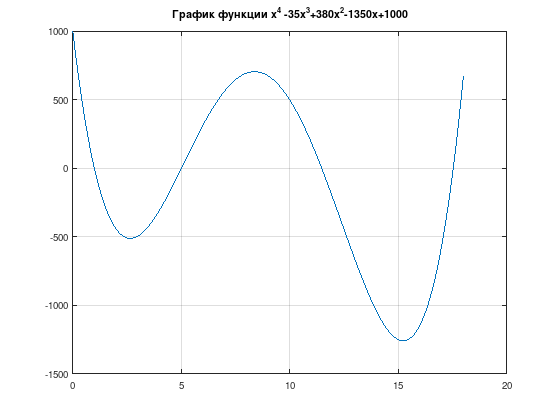

In [2]:
clear;
%Функция вычисления разделённой разности первого порядка
function y=razd(x1,x2,f1,f2)
  y=(f2-f1)/(x2-x1);
endfunction
%Функция вычисления разделённой разности второго порядка
function y=razd2(x0,x1,x2,f0,f1,f2)
  y=(razd(x1,x2,f1,f2)-razd(x0,x1,f0,f1))/(x0-x2);
endfunction
%Функция вычисления значения полинома в точке
%Если pr=1, вычисление по схеме Горнера
%Если pr=2, вычисление по классической формуле полинома
function y0=gr(P,N,x0,pr)
    if pr==1 
    y0=0;
    for i=1:1:N
      y0=P(i)+x0*y0;
    end
  end
  if pr==2 
    y0=0
    for i=1:N
      y0=y0+x0^(N-i-1)*P(i);
    end
  end
endfunction
%Функция понижения порядка полинома с помощью
%процедуры синтетического деления.
function B=delenie_gorner(P,N,alfa)
  B(1)=P(1);
  for i=2:1:N
    B(i)=B(i-1)*alfa+P(i);
  end
endfunction
%Функция нахождения очередного корня полинома
%методом Мюллера (парабол)
function x=Muller(P,N,x1)
  x2=1.15*x1;
  x0=0.85*x1;
  f0=gr(P,N,x0,1);
  f1=gr(P,N,x1,1);
  f2=gr(P,N,x2,1);
  x=x2;
  while abs(gr(P,N,x,1))>abs(eps)
      u=razd(x0, x1, f0, f1) + razd( x0, x2, f0, f2 )  - razd( x1, x2, f1, f2);
      t1=u-sqrt(u*u-4.*f0*razd2(x0, x1, x2,f0,f1,f2));
      t2=u+sqrt(u*u-4.*f0*razd2(x0, x1, x2,f0,f1,f2));
    if abs(t1)>abs(t2) 
      t=t1;
    else
      t=t2;
    end
    x=x0-2*gr(P,N,x0,1)/t;
    x2=x1; x1=x0; x0=x;
    f0=gr(P,N,x0,1);
    f1=gr(P,N,x1,1);
    f2=gr(P,N,x2,1);
  end
endfunction
%Функция нахождения всех корней полинома
function r=korni_polynom(P,N)
  t=1;
  display("Корни полинома:");
  while(N>1)
    x=1;
    x=Muller(P,N, x);
    printf("x2=%f\n",x);
    r(t)=x;
    P=delenie_gorner(P,N,x);
    N=N-1;
    t=t+1;
  end
endfunction
%Задание коэффициентов тестового полинома
H=[1 -35 380 -1350 1000];
%Вызов функции нахождения корней полинома
Y=korni_polynom(H,5);
%построение графика полинома
L=0:0.1:18;
for i=1:length(L)
M(i)=gr(H,5,L(i),1);
end
plot(L',M);
grid on;
title("График функции x^4 -35x^3+380x^2-1350x+1000");

<p style="border: 2px solid #cccccc; padding: 10px;">
   <b>Задача 6.2</b>
   Написать программу нахождения действительных корней полинома
   $$P_1 x^n + P_2 x^{n-1} + \cdots + P_{n} x + P_{n+1}=0.$$
</p>
<p>В качестве тестового будем использовать тот же многочлен $$x^4-35x^3+280x^2-1350x+1000=0.$$</p>
<p>
    В этой программе будем использовать метод обратной параболы. Код про-
граммы приведён ниже. Результаты работы этой программы и предыдущей совпадают.
</p>

In [3]:
%Задание коэффициентов тестового полинома
H=[1 -35 380 -1350 1000];
%Функция вычисления разделенной разности первого порядка	
function y=razd(x1,x2,f1,f2)
  y=(f2-f1)/(x2-x1);
endfunction
%Функция вычисления разделенной разности первого порядка	
function y=razd2(x0,x1,x2,f0,f1,f2)
  y=(razd(x1,x2,f1,f2)-razd(x0,x1,f0,f1))/(x0-x2);
endfunction
%Функция вычисления значения полинома в точке по схеме Горнера
function y0=gorner(P,N,x0)
  y0=0;
  for i=1:1:N
    y0=P(i)+x0*y0;
  end
endfunction
%Функция понижения порядка полинома с помощью 
%процедуры синтетического деления.
function B=delenie_gorner(P,N,alfa)
  B(1)=P(1);
  for i=2:1:N
    B(i)=B(i-1)*alfa+P(i);
  end
endfunction
%Функция нахождения очередного корня полинома 
%методом обратной параболы
function [pr,x]=obr_parabol(P,N,x1,K)
  x2=1.15*x1;
  x0=0.85*x1;
  pr=1;
  f0=gorner(P,N,x0);
  f1=gorner(P,N,x1);
  f2=gorner(P,N,x2);
  i=0;
  while abs(f2)>eps
    i=i+1;
    a=((x2-x1)*(f1-f0)-(x1-x0)*(f2-f1))/((f2-f1)*(f1-f0)*(f2-f0));
    b=-a*(f2+f1)+(x2-x1)/(f2-f1);
    c=x2-a*f2*f2-b*f2;
    x0=x1;
    x1=x2;
    x2=c;
    f0=gorner(P,N,x0);
    f1=gorner(P,N,x1);
    f2=gorner(P,N,x2);
    if i>K  
      pr=0;
      break;
    end
  end
  x=x2;
endfunction
%Функция нахождения всех корней полинома
function r=korni_obr_parabola(P,N)
  t=1;
  while(N>1)
    x=1;
    [fl,x]=obr_parabol(P,N,x,500);
    if fl 
        ;
        r(t)=x;
        P=delenie_gorner(P,N,x);
        t=t+1;
      else
        break;
    end;
    N=N-1;
  end
endfunction
%Вызов функции нахождения корней полинома
Yobr=korni_obr_parabola(H,5);
%Вывод корней
printf("x=%f\n",Yobr);

x=0.994225
x=5.000000
x=11.474355
x=17.531420


<p>На взгляд авторов, следует пользоваться именно методом парабол, а если
   вам нужны только действительные корни, то следует избавиться от комплексных
   уже после нахождения всех корней.</p>
<p>Задачи решения нелинейных уравнений и систем не являются тривиальными.
   Написание программ решения нестандартных уравнений требует значительного
   опыта программирования. Рассмотрим возможности Octave для решения подобных задач.</p>
  